# Phân tích giỏ hàng, hành vi tiêu dùng để đưa ra chiến lược kinh doanh sử dụng khai phá luật kết hợp

## Chương 1: Khảo sát nghiệp vụ và thu thập dữ liệu


- Ta sẽ chọn cách trường phù hợp trước rồi mới tiền xử lý dữ liệu
- Trước khi lựa chọn ta sẽ thống kê các thuộc tính ra trước.
- Từ bộ dữ liệu thu thập được -> ta lựa chọn các thuộc tính
- kết quả thu về là tập dữ liệu gồm 2 thuộc tính
- chuyển đổi định dạng tập dữ liệu về dạng đúng


### 1. Nhận thông tin về tập dữ liệu.

In [1]:
import pandas as pd

data = pd.read_csv('CSVfile/ECommerce_consumer behaviour.csv')
df = data.copy()
#print(df.head())
# Hiển thị 5 dòng đầu tiên (mặc định)
# Hiển thị dữ liệu với định dạng Pandas Styler
df.head().style.set_properties(**{'background-color': 'white', 'color': 'black', 'border-color': 'black'})

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,nan,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,nan,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,nan,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,nan,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,nan,83,5,0,4,produce,fresh vegetables


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
dtypes: float64(1), int64(9), object(2)
memory usage: 184.9+ MB


### Đặc điểm của dữ liệu:
order_id: Mã số duy nhất đại diện cho từng đơn hàng.

user_id: Mã số duy nhất đại diện cho từng khách hàng, giúp nhận diện các đơn hàng của cùng một người dùng.

order_number: Số thứ tự của đơn hàng đối với mỗi người dùng, thể hiện số lần mua hàng của khách hàng đó.

order_hour_of_day: Giờ trong ngày mà các đơn hàng được thực hiện, thể hiện dưới dạng từ số 0 - 23 (tương ứng với hệ thống 24 giờ thực)

days_since_prior_order: Số ngày kể từ đơn hàng trước của khách hàng, cho phép đánh giá tần suất mua sắm của khách hàng.

product_id: Mã số duy nhất cho từng sản phẩm, liên kết với thông tin sản phẩm.
add_to_cart_order: Thứ tự mà sản phẩm được thêm vào giỏ hàng trong một đơn hàng cụ thể

reordered: Cho biết sản phẩm có được đặt lại hay không, tức là sản phẩm đã được khách hàng mua trước đó hay chưa thể hiện qua biến nhị phân 1 (có) hay 0 (không).

department_id: Mã số đại diện cho các danh mục mà sản phẩm thuộc về (ví dụ như đồ ăn, đồ uống, …)

department: Tên của các danh mục, mô tả hàng hóa mà sản phẩm thuộc về.

product_name: Tên của sản phẩm, cung cấp chi tiết về mặt hàng đã mua trong đơn hàng.


  *   Thống kê số lượng null ở mỗi cột

In [3]:
print("\nSố lượng giá trị thiếu trong mỗi cột:")
print(df.isnull().sum())


Số lượng giá trị thiếu trong mỗi cột:
order_id                       0
user_id                        0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    124342
product_id                     0
add_to_cart_order              0
reordered                      0
department_id                  0
department                     0
product_name                   0
dtype: int64


  * Thống kê số lượng giá trị duy nhất

In [4]:
# Danh sách các cột để thống kê
columns_to_check = [
    'order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
    'days_since_prior_order', 'product_id', 'add_to_cart_order', 'reordered',
    'department_id', 'department', 'product_name'
]

# Thống kê số lượng giá trị duy nhất trong các cột
unique_values_counts = df[columns_to_check].nunique()

# In kết quả
print("\nSố lượng giá trị duy nhất trong các cột được chọn:")
print(unique_values_counts)


Số lượng giá trị duy nhất trong các cột được chọn:
order_id                  200000
user_id                   105273
order_number                 100
order_dow                      7
order_hour_of_day             24
days_since_prior_order        31
product_id                   134
add_to_cart_order            137
reordered                      2
department_id                 21
department                    21
product_name                 134
dtype: int64


  * Hiển thị các dữ liệu duy nhất:

In [5]:
print("\n Các giá trị duy nhất của Order_number:")
print(df['order_number'].unique())

print("\n Các giá trị duy nhất của Order_dow:")
print(df['order_dow'].unique())

print("\n Các giá trị duy nhất của Department:")
print(df['department'].unique())

print("\n Các giá trị duy nhất của days_since_prior_order:")
print(df['days_since_prior_order'].unique())


 Các giá trị duy nhất của Order_number:
[  1  14  81   3  11   5  12  78   2  10  13   8   6   4  23  59  25  36
  19   7  63  51  28   9  18  27  61  30  91  46  21  42  16  41  62  32
  52  20  56  15  68  33  50  38  17  55  44  26  72  67  29  45  58  43
  34  66  35  47  53  48  24  31  77  22  57  93  86  80  40  39  82  74
  49  37  71  69  70  60 100  96  75  87  90  54  98  65  76  83  84  79
  92  97  64  73  95  88  85  89  99  94]

 Các giá trị duy nhất của Order_dow:
[2 3 0 1 6 5 4]

 Các giá trị duy nhất của Department:
['pantry' 'dairy eggs' 'produce' 'canned goods' 'meat seafood' 'frozen'
 'bakery' 'beverages' 'breakfast' 'snacks' 'international' 'household'
 'personal care' 'babies' 'deli' 'dry goods pasta' 'missing' 'alcohol'
 'pets' 'bulk' 'other']

 Các giá trị duy nhất của days_since_prior_order:
[nan  3.  6.  7. 30. 20.  4.  8. 15. 10. 28.  9. 12. 11.  2. 25. 13. 29.
 14. 21.  5.  1. 18.  0. 19. 17. 22. 26. 24. 16. 23. 27.]


  * Kiểm tra xem có sản phẩm nào mang nhiều id không và ngược lại

In [6]:
import pandas as pd

# Chọn 2 cột product_id và product_name
product_df = df[['product_id', 'product_name']].drop_duplicates()

# Kiểm tra nếu có nhiều hơn 1 product_id cho cùng một product_name
product_name_multiple_ids = product_df.groupby('product_name')['product_id'].nunique()
product_name_multiple_ids = product_name_multiple_ids[product_name_multiple_ids > 1]

if not product_name_multiple_ids.empty:
    print("Các sản phẩm có nhiều hơn 1 ID:")
    print(product_name_multiple_ids)
else:
    print("Không có sản phẩm nào có nhiều hơn 1 ID.")

# Kiểm tra nếu có nhiều hơn 1 product_name cho cùng một product_id
product_id_multiple_names = product_df.groupby('product_id')['product_name'].nunique()
product_id_multiple_names = product_id_multiple_names[product_id_multiple_names > 1]

if not product_id_multiple_names.empty:
    print("\nCác ID có nhiều hơn 1 sản phẩm:")
    print(product_id_multiple_names)
else:
    print("Không có ID nào ứng với nhiều hơn 1 sản phẩm.")


Không có sản phẩm nào có nhiều hơn 1 ID.
Không có ID nào ứng với nhiều hơn 1 sản phẩm.


  * Kiểm tra xem có sản phẩm nào nằm ở nhiều phân loại không:

In [7]:
import pandas as pd

# Kiểm tra nếu có nhiều hơn một department cho cùng một product_name
product_multiple_departments = df.groupby('product_name')['department'].nunique()
product_multiple_departments = product_multiple_departments[product_multiple_departments > 1]

if not product_multiple_departments.empty:
    print("Các sản phẩm có nhiều hơn 1 phòng ban (department):")
    print(product_multiple_departments)
else:
    print("Không có sản phẩm nào thuộc nhiều hơn 1 thể loại.")


Không có sản phẩm nào thuộc nhiều hơn 1 thể loại.


  * Lựa chọn các thuộc tính và loại bỏ các thuộc tính không cần thiết:

In [9]:
import pandas as pd

df1 = data.copy()

# Lấy ra 2 cột 'order_id' và 'product_name'
df_filtered = df1[['order_id', 'product_name']]

# Hiển thị 5 dòng đầu tiên của kết quả
print(df_filtered.head())

# Lấy ra số lượng dòng trong tập dữ liệu
num_rows = df_filtered.shape[0]

# In ra số lượng dòng
print(f"Số lượng dòng trong tập dữ liệu: {num_rows}")

   order_id        product_name
0   2425083  baking ingredients
1   2425083     soy lactosefree
2   2425083              butter
3   2425083    fresh vegetables
4   2425083    fresh vegetables
Số lượng dòng trong tập dữ liệu: 2019501


  * trực quan hóa:

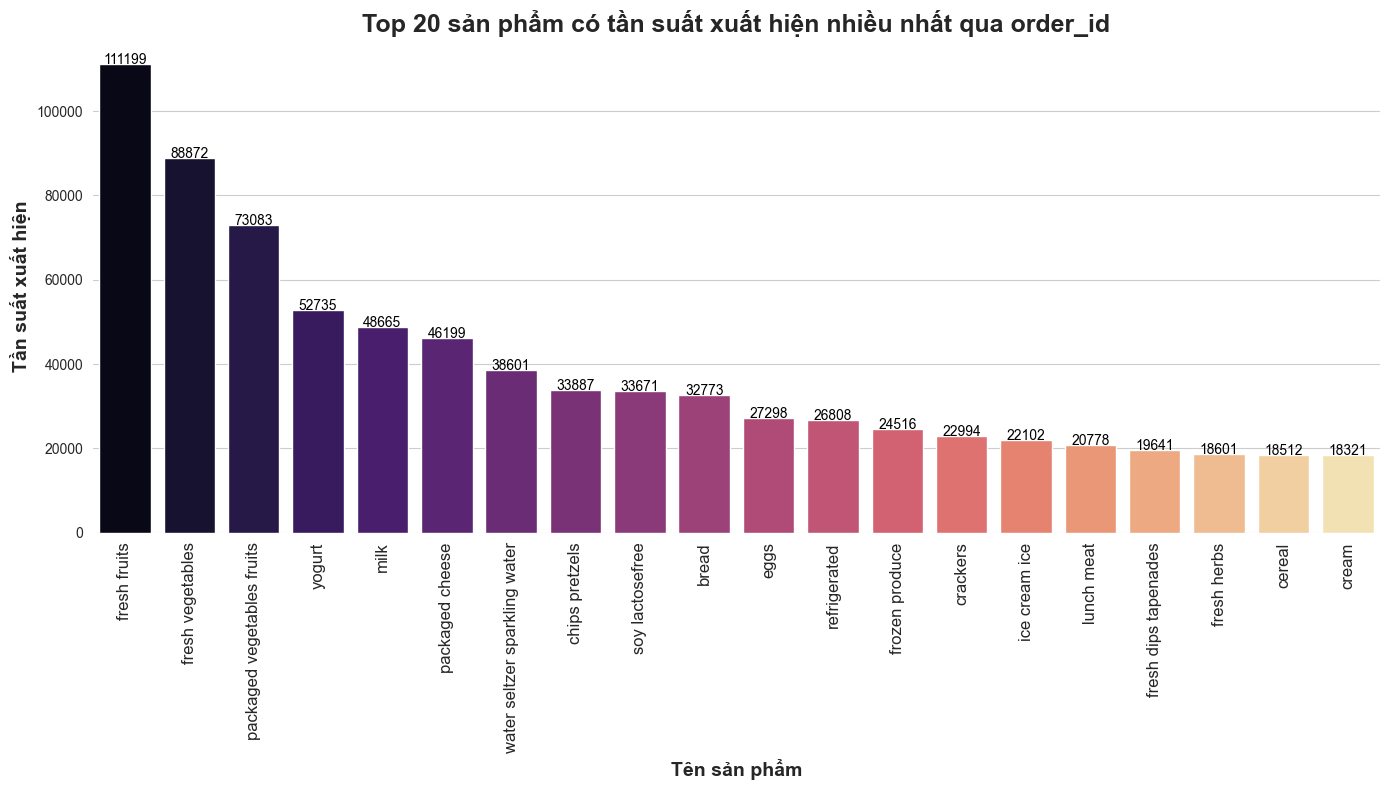

In [15]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

folder_path = 'png'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Đếm tần suất xuất hiện của mỗi sản phẩm theo 'order_id'
product_frequency = df.groupby('product_name')['order_id'].nunique()

# Sắp xếp tần suất xuất hiện theo thứ tự giảm dần
product_frequency = product_frequency.sort_values(ascending=False).head(20)  # Lấy top 20 sản phẩm

# Thiết lập kích thước cho biểu đồ
plt.figure(figsize=(14, 8))  # Điều chỉnh kích thước cho biểu đồ thanh dọc

# Vẽ biểu đồ thanh dọc (x là tên sản phẩm, y là tần suất xuất hiện)
ax = sns.barplot(x=product_frequency.index, y=product_frequency.values, hue=product_frequency.index, palette="magma", legend=False)


# Thêm giá trị tần suất trực tiếp trên các thanh
for i, value in enumerate(product_frequency.values):
    ax.text(i, value + 0.5, f'{value}', ha='center', fontsize=10, color='black')

# Thiết lập tiêu đề và nhãn trục với kích thước font lớn hơn
plt.title("Top 20 sản phẩm có tần suất xuất hiện nhiều nhất qua order_id", fontsize=18, weight='bold')
plt.ylabel("Tần suất xuất hiện", fontsize=14, weight='bold')
plt.xlabel("Tên sản phẩm", fontsize=14, weight='bold')

# Xoay nhãn trục X để dễ đọc hơn (với sản phẩm dài)
plt.xticks(rotation=90, ha='center', fontsize=12)

# Làm sạch vùng xung quanh biểu đồ để tập trung vào nội dung chính
sns.despine(left=True, bottom=True)


# Hiển thị biểu đồ
plt.tight_layout()
plt.savefig(os.path.join(folder_path, 'product_frequency_plot.png'))  # Lưu dưới dạng file PNG
plt.show()


In [ ]:
folder_path = 'png'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    
    
    
plt.tight_layout()
plt.savefig(os.path.join(folder_path, 'product_frequency_plot.png'))  # Lưu dưới dạng file PNG
plt.show()

In [17]:
plt.savefig('png/product_frequency_plot.png')

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\KPDL\\pythonProject\\png\\product_frequency_plot.png'

<Figure size 640x480 with 0 Axes>

## Chương 2: Tiền xử lý dữ liệu  

**Bắt đầu làm bài**